In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Tarea 1 - punto 1

Construir una curva que describa el comportamiento del agua precipitable en función de la temperatura en la superficie en un rango de 0 a 40 C.

In [66]:
p0 = 101.3 # Presión aire húmedo en la superficie del suelo (kPa)
T0 = 30 # Temperatura del aire en la superficie del suelo (°C)
alpha = 6.5 # Tasa de lapso (°C/km)
Ra = 287 # Constante gas aire húmedo
Rd = 287 # Constante gas aire seco
A = 1 # Área (m2)
H = 10 # Altura de la columna (km)
dz = 1/1000 # Tamaño de discretización espacial (km)

## Funciones

In [67]:
def temperatura(z, T0, alpha):
    # z: elevación en km
    T = -alpha*z + T0
    return T

def presion(T, p0, T0, alpha, g=9.81, Ra=287):
    p = p0 * ((T+273.15)/(T0+273.15)) ** (g/(Ra*alpha))
    return p

def presion_vapor_sat(T):
    if (T>=0):
        es = 611 * np.exp(17.27*T/(T + 237.3))
    else:
        es = 611 * np.exp(21.87*T/(T + 265.5))
    return es

def densidad_gas_ideal(p, T, R):
    ro = p/(R * (T+273.14))
    return ro

def precipitable(H, dz, p0, T0, alpha, Ra, Rd, A):
    z = np.arange(0, H + dz, dz)

    p = []
    T = []
    es = []
    ro_aire = []
    ro_vapor = []
    q = []
    dm = []

    for i, z_i in enumerate(z):
        if i == 0:
            p_i = p0
            T_i = T0
        else:
            T_i = temperatura(z_i, T0, alpha)
            p_i = presion(T_i, p0, T0, alpha/1000)

        es_i = presion_vapor_sat(T_i)/1000
        ro_aire_i = densidad_gas_ideal(p_i*1000, T_i, Ra)
        ro_vapor_i = densidad_gas_ideal(es_i*1000, T_i, Rd/0.622)
        q_i = ro_vapor_i/ro_aire_i

        p = p + [p_i]
        T = T + [T_i]
        es = es + [es_i]
        ro_aire = ro_aire + [ro_aire_i]
        ro_vapor = ro_vapor + [ro_vapor_i]
        q = q + [q_i]

        if i > 0:
            dm_i = (ro_vapor[i] + ro_vapor[i-1])/2 * dz * 1000 * A
            dm = dm + [dm_i]

    M = np.sum(dm)
    return M

## Cálculos

In [71]:
T0_array = np.linspace(0,40,100)
M_list = np.array([precipitable(H, dz, p0, T0_i, alpha, Ra, Rd, A) for T0_i in T0_array])

## Figura

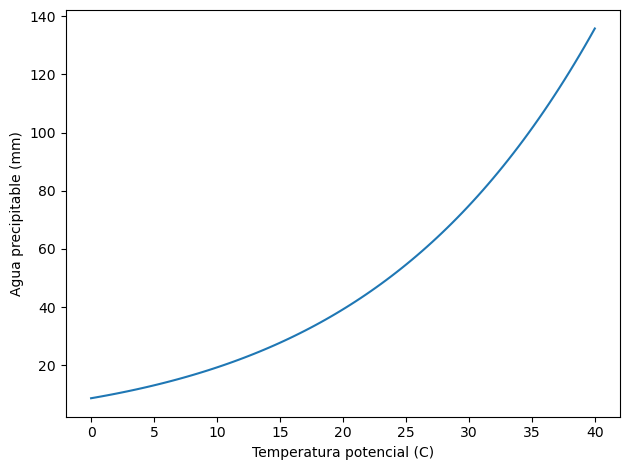

In [75]:
fig, axs = plt.subplots(1, 1)
axs.plot(T0_array, M_list)
axs.set_ylabel('Agua precipitable (mm)')
axs.set_xlabel('Temperatura potencial (C)')

fig.tight_layout()
plt.show()

El agua precipitable aumenta con la temperatura potencial en una columna estática saturada. Esto se desprende directamente del aumento de la capacidad de la atmósfera en contener humedad con el aumento de la temperatura (i.e., la presión de vapor de saturación aumenta con la temperatura).

# Tarea 1 - punto 2

Determinar la presión de vapor, la presión de aire húmedo, la humedad específica, la humedad relativa y la densidad del aire húmedo en un rango de elevaciones entre 0 y 10 km dadas las siguientes condiciones en superficie

In [80]:
p0 = 101.1 # Presión del aire en superficie (kPa)
tpr = 20 # Temperatura de punto de rocío en superficie (C)
t0 = 25 # Temperatura del aire en superficie (C)
alpha = 9 # Tasa de lapso (C/km)

## Funciones

In [81]:
def presion(t, p0, t0, alpha, R=287, g=9.81):
    p = p0 * ((t+273.15)/(t0+273.15)) ** (g/(alpha*R))
    return p

def presion_vapor_sat(t):
    if (t>=0):
        es = 611 * np.exp(17.27*t/(t + 237.3))
    else:
        es = 611 * np.exp(21.87*t/(t + 265.5))
    return es

def temperatura(z, t0, alpha):
    t = t0 - alpha*z
    return t

def humedad_relativa(e, es):
    rh = e/es * 100
    return rh

def humedad_especifica(e, p):
    q = 0.622 * e/p
    return q

def densidad(p, t, R=287):
    rho = p/(R * (t + 273.15))
    return rho

## Cálculos

In [99]:
z = np.linspace(0,10,1000) # Rango de elevaciones en km
e0 = presion_vapor_sat(tpr)/1000

t = temperatura(z*1000, t0, alpha/1000)
e = np.array([presion(t_i, e0, t0, alpha/1000, 287/0.622) for t_i in t])
p = np.array([presion(t_i, p0, t0, alpha/1000) for t_i in t])
es = np.array([presion_vapor_sat(t_i) for t_i in t])
q = np.array([humedad_especifica(e_i, p_i) for e_i, p_i in zip(e, p)])
rh = np.array([humedad_relativa(e_i, es_i) for e_i, es_i in zip(e, es)])
rho_a = np.array([densidad(p_i*1000, t_i) for p_i, t_i in zip(p, t)])
rho_v = 0.622*e*1000/(287*(t+273.15))

## Figuras

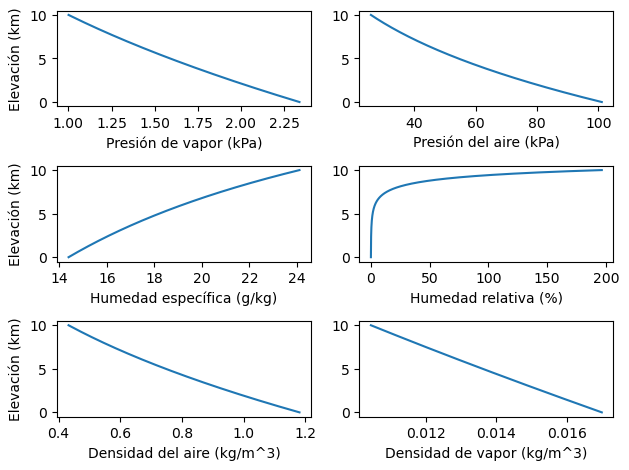

In [103]:
fig, axs = plt.subplots(3, 2)
axs[0,0].plot(e, z)
axs[0,0].set_xlabel('Presión de vapor (kPa)')
axs[0,0].set_ylabel('Elevación (km)')

axs[0,1].plot(p, z)
axs[0,1].set_xlabel('Presión del aire (kPa)')

axs[1,0].plot(q*1000, z)
axs[1,0].set_xlabel('Humedad específica (g/kg)')
axs[1,0].set_ylabel('Elevación (km)')

axs[1,1].plot(rh, z)
axs[1,1].set_xlabel('Humedad relativa (%)')

axs[2,0].plot(rho_a, z)
axs[2,0].set_xlabel('Densidad del aire (kg/m^3)')
axs[2,0].set_ylabel('Elevación (km)')

axs[2,1].plot(rho_v, z)
axs[2,1].set_xlabel('Densidad de vapor (kg/m^3)')

fig.tight_layout()
plt.show()

### Punto de condensación

In [94]:
nc = np.interp(100, rh, z)
print(f'El nivel de condensación es {nc:2.2} km')

El nivel de condensación es 9.4 km


La humedad relativa y la humedad específica aumentan con la elevación, como consecuencia de la pérdida de capacidad de la masa de aire en contener humedad cuando ésta se enfría adiabáticamente (i.e., la tasa de pérdida de presión de vapor de saturación es mayor a la tasa de pérdida de presión de vapor con la elevación). Es importante anotar que a una elevación de 9.4 km se alcanza el nivel de condensación, por encima del cual el vapor de agua empieza a condensarse, liberando calor latente y siguiendo un proceso de enfriamiento pseudo-adiabático.

Por otro lado, tanto la densidad como la presión total y de vapor, disminuyen con la elevación. La disminuión de la densidad es consistente con el proceso de enfriamiento de la masa de aire con la elevación, ya que, en un proceso adiabático, a menor temperatura ocurre una menor densidad (i.e., el volumen de la masa de aire se expande con la elevación al haber una reducción de la presión).  